## <u>Name </u> : ADVAIT GURUNATH CHAVAN
## <u>Contact Number </u> : +91 70214 55852
## <u>Mail ID </u> : advaitchavan135@gmail.com 

## Oasis Infobyte Data Science Intern

## Task 5 : Sales Predicition using Python

<img src = "demo.jpg">

## 1. Importing the necessary dependencies

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.io as plio
plio.templates
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from xgboost import XGBRegressor

import joblib

from warnings import filterwarnings
filterwarnings(action='ignore')

## 2. Exploring the dataset

In [10]:
data = pd.read_csv('advertising.csv')

In [11]:
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


### Removing the unnecessary column Unnamed: 0

In [13]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [17]:
data
#data.to_csv('advertising_cleaned.csv', index=False)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [18]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [21]:
data.duplicated().sum()

0

### Correlation plot to visualize the impact of each feature on target(sales)

<AxesSubplot:>

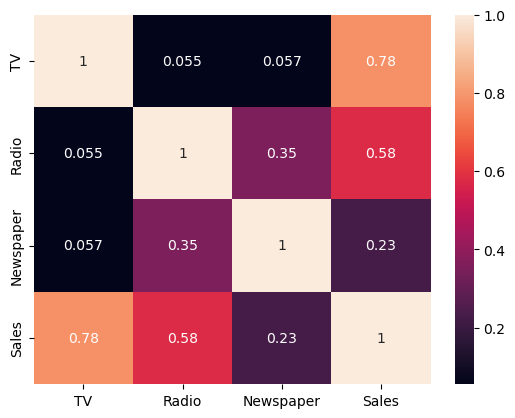

In [19]:
sns.heatmap(data.corr(),annot=True)

#### From the above correlation plot we have feature: -
#### 1. 'TV' having an impact score of 0.78 on Sales
#### 2. 'Radio' having an impact score of 0.58 on Sales
#### 3. 'Newspaper' having an impact score of 0.23 on Sales

### [A]Plotly Scatterplot of TV(feature) vs Sales(Target)

In [108]:
fig = px.scatter(x=data['TV'], y=data['Sales'], labels={'x': 'TV', 'y': 'Sales'},color_discrete_sequence=['orange'])
fig.update_layout(
    title="Scatter Plot of TV(Feature) vs Sales(Target)",
    xaxis_title="TV",
    yaxis_title="Sales"
)
fig.show()

#### From the above scatterplot we can infer that 
#### As the score of TV is increasing score of Sales is also increasing

### [B]Plotly Scatterplot of Radio(feature) vs Sales(Target)

In [33]:
fig = px.scatter(x=data['Radio'], y=data['Sales'], labels={'x': 'Radio', 'y': 'Sales'},color_discrete_sequence=['red'])
fig.update_layout(
    title="Scatter Plot of Radio(Feature) vs Sales(Target)",
    xaxis_title="Radio",
    yaxis_title="Sales"
)
fig.show()

#### From the above scatterplot we can infer that 
#### As the score of Radio is increasing score of Sales is also increasing

### [C]Plotly Scatterplot of Newspaper(feature) vs Sales(Target)

In [24]:
fig = px.scatter(x=data['Newspaper'], y=data['Sales'], labels={'x': 'Newspaper', 'y': 'Sales'})
fig.update_layout(
    title="Scatter Plot of Newspaper(Feature) vs Sales(Target)",
    xaxis_title="Newspaper",
    yaxis_title="Sales"
)
fig.show()

### [i] Distribution of TV feature

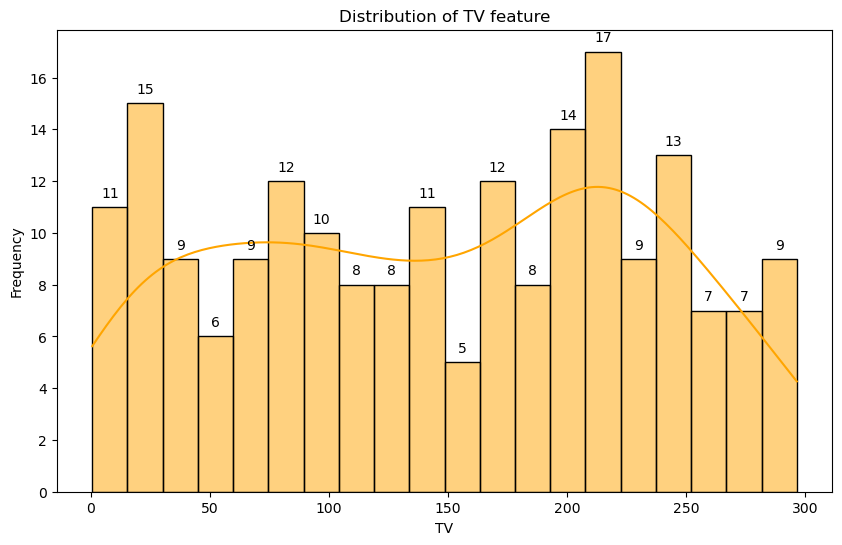

In [45]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(data['TV'], bins=20, kde=True, color='orange')
plt.xlabel('TV')
plt.ylabel('Frequency')
plt.title('Distribution of TV feature')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')
plt.show()

### [ii] Distribution of Radio feature

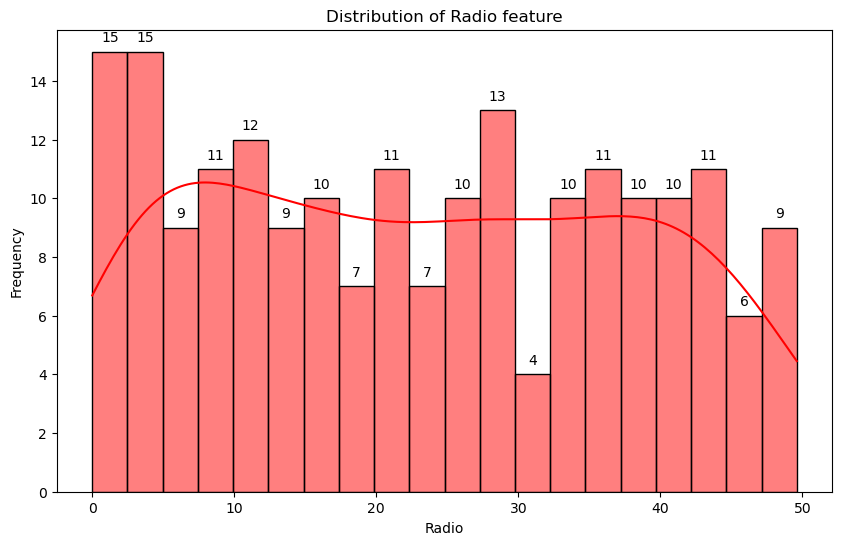

In [46]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(data['Radio'], bins=20, kde=True, color='red')
plt.xlabel('Radio')
plt.ylabel('Frequency')
plt.title('Distribution of Radio feature')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')
plt.show()

### [iii] Distribution of Newspaper feature

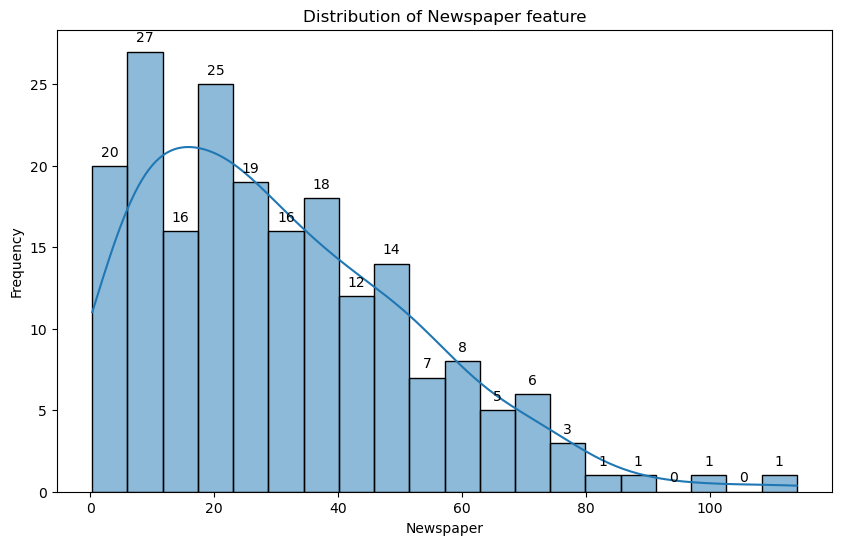

In [47]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(data['Newspaper'], bins=20, kde=True)
plt.xlabel('Newspaper')
plt.ylabel('Frequency')
plt.title('Distribution of Newspaper feature')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')
plt.show()

### [iv] Distribution of Sales

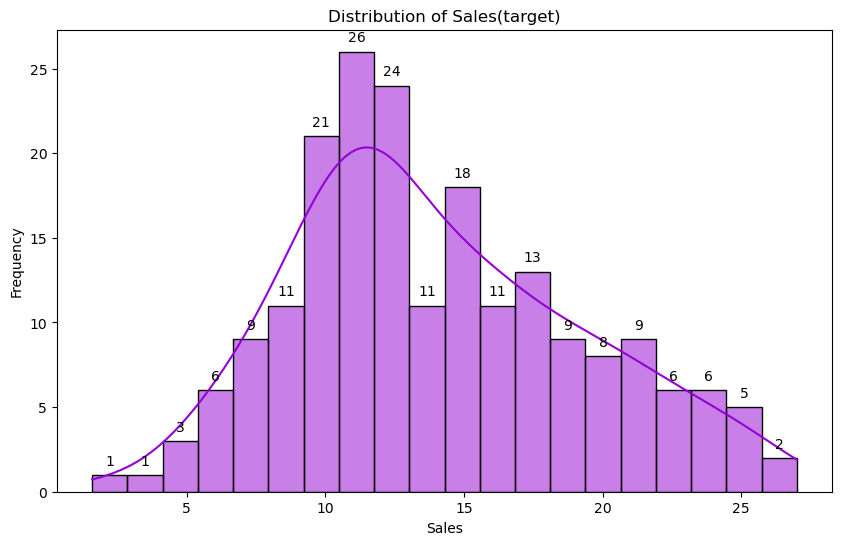

In [48]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(data['Sales'], bins=20, kde=True, color='darkviolet')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales(target)')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')
plt.show()

### 3. Preparing data for Training (Data Modelling)

#### Since, we need to predict the Sales using different features of the dataset
#### We consider Sales as a seperate dataset say 'y' and all other features as 'x'

In [54]:
x = data.iloc[:,:3]
y = data.iloc[:,3:]

In [53]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [55]:
y

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

### 4.Training Models using the above data

#### [A] Linear Regression Model

In [59]:
model_1 = LinearRegression()
model_1.fit(x_train, y_train)
y_pred_1 = model_1.predict(x_test)

In [60]:
mse = mean_squared_error(y_test, y_pred_1)
r2 = r2_score(y_test, y_pred_1)
print("Mean Square Error is :", mse)
print("R-Squared score is :",r2)

Mean Square Error is : 3.4103199537271522
R-Squared score is : 0.8859649783578775


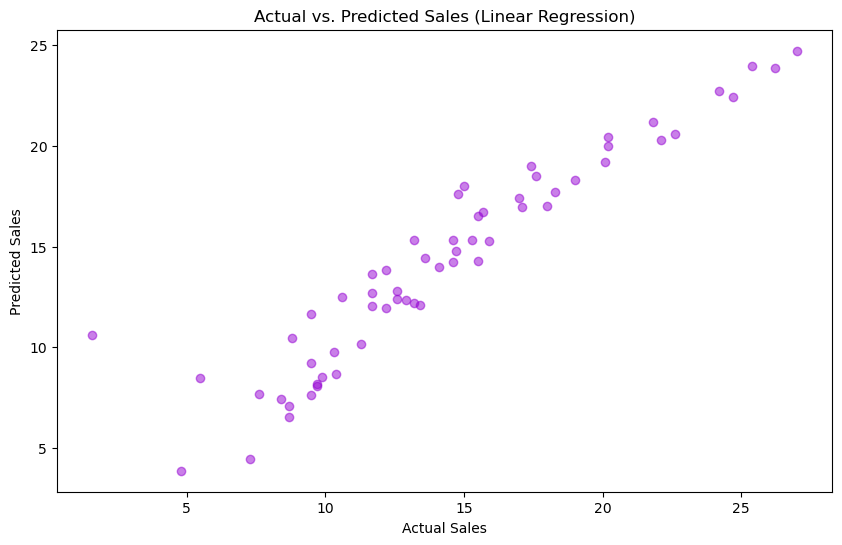

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_1, alpha=0.5, color='darkviolet')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales (Linear Regression)')
plt.show()

#### [B] Random Forest Regression Model

In [62]:
model_2 = RandomForestRegressor() 
model_2.fit(x_train, y_train) 
y_pred_2 = model_2.predict(x_test)

In [63]:
mse = mean_squared_error(y_test, y_pred_2)
r2 = r2_score(y_test, y_pred_2)
print("Mean Square Error is :", mse)
print("R-Squared score is :",r2)

Mean Square Error is : 0.9201265666666639
R-Squared score is : 0.9692326073896234


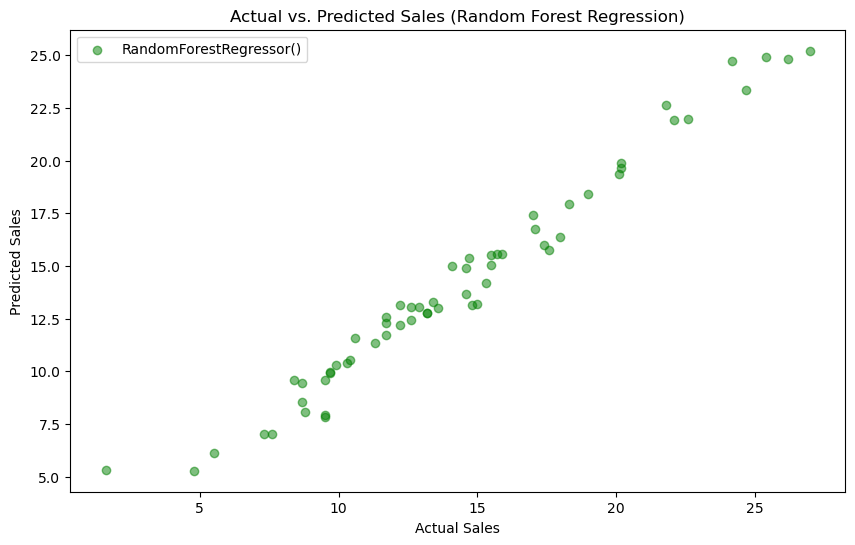

In [65]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_2, label=model_2, alpha=0.5, color='green')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales (Random Forest Regression)')

plt.legend()
plt.show()

#### [C] Ridge Regression Model

In [66]:
model_3 = Ridge() 
model_3.fit(x_train, y_train) 
y_pred_3 = model_3.predict(x_test)

In [67]:
mse = mean_squared_error(y_test, y_pred_3)
r2 = r2_score(y_test, y_pred_3)
print("Mean Square Error is :", mse)
print("R-Squared score is :",r2)

Mean Square Error is : 3.410298600429495
R-Squared score is : 0.885965692374097


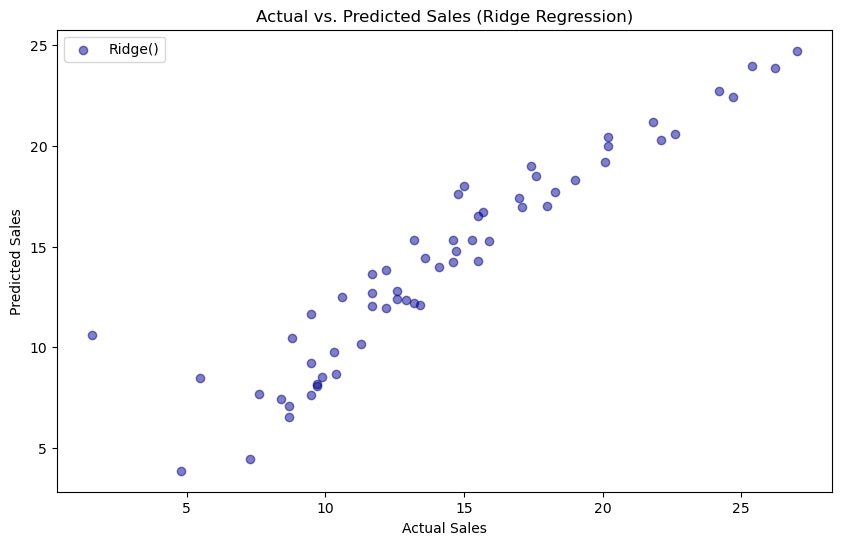

In [68]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_3, label=model_3, alpha=0.5, color='darkblue')

plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales (Ridge Regression)')
plt.legend()
plt.show()

#### [D] Lasso Regression Model

In [69]:
model_4 = Lasso() 
model_4.fit(x_train, y_train) 
y_pred_4 = model_4.predict(x_test)

In [70]:
mse = mean_squared_error(y_test, y_pred_4)
r2 = r2_score(y_test, y_pred_4)
print("Mean Square Error is :", mse)
print("R-Squared score is :",r2)

Mean Square Error is : 3.3691010188533244
R-Squared score is : 0.8873432660828356


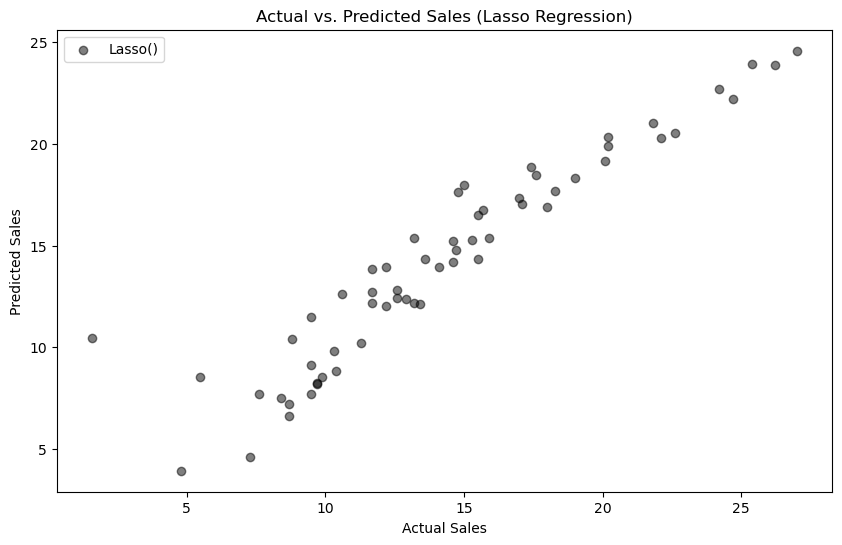

In [71]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_4, label=model_4, alpha=0.5, color='black')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales (Lasso Regression)')

plt.legend()
plt.show()

#### [E] ElasticNet Regression Model

In [72]:
model_5 = ElasticNet() 
model_5.fit(x_train, y_train) 
y_pred_5 = model_5.predict(x_test)

In [73]:
mse = mean_squared_error(y_test, y_pred_5)
r2 = r2_score(y_test, y_pred_5)
print("Mean Square Error is :", mse)
print("R-Squared score is :",r2)

Mean Square Error is : 3.3869938622701663
R-Squared score is : 0.8867449612862289


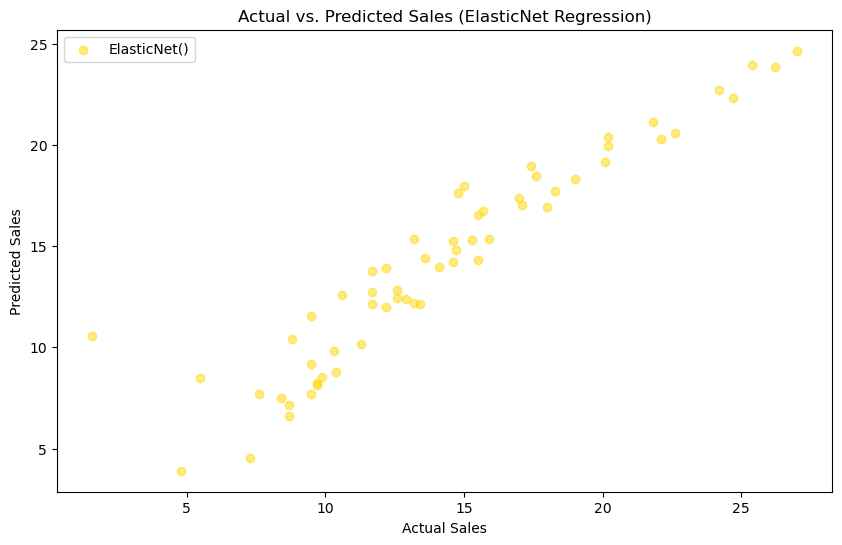

In [104]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_5, label=model_5, alpha=0.5, color='gold')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales (ElasticNet Regression)')
plt.legend()
plt.show()

#### [F] Gradient Boosting Regression Model

In [75]:
model_6 = GradientBoostingRegressor() 
model_6.fit(x_train, y_train) 
y_pred_6 = model_6.predict(x_test)

In [76]:
mse = mean_squared_error(y_test, y_pred_6)
r2 = r2_score(y_test, y_pred_6)
print("Mean Square Error is :", mse)
print("R-Squared score is :",r2)

Mean Square Error is : 0.7200909946419605
R-Squared score is : 0.9759214404300837


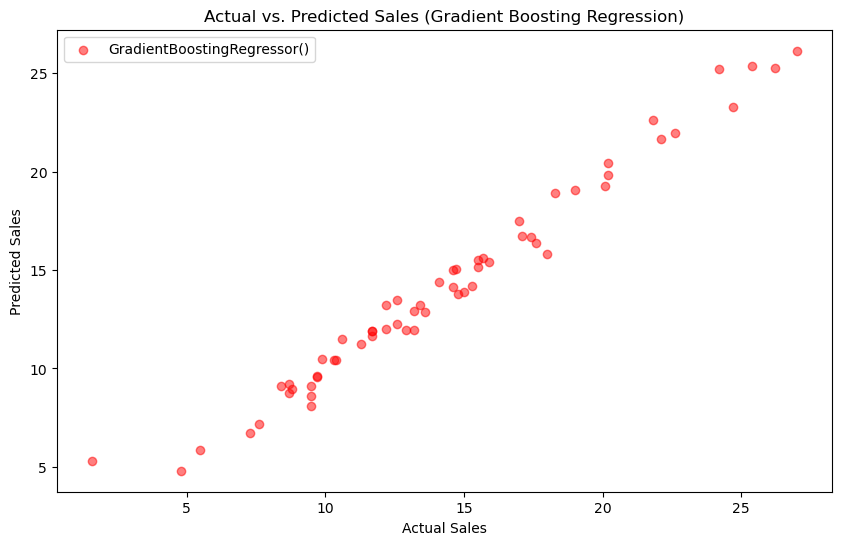

In [77]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_6, label=model_6, alpha=0.5, color='red')

plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales (Gradient Boosting Regression)')
plt.legend()
plt.show()

#### [G] XGBoost Regression Model

In [78]:
model_7 = XGBRegressor()
model_7.fit(x_train, y_train) 
y_pred_7 = model_7.predict(x_test)

In [79]:
mse = mean_squared_error(y_test, y_pred_7)
r2 = r2_score(y_test, y_pred_7)
print("Mean Square Error is :", mse)
print("R-Squared score is :",r2)

Mean Square Error is : 0.7874030957126344
R-Squared score is : 0.9736706437287413


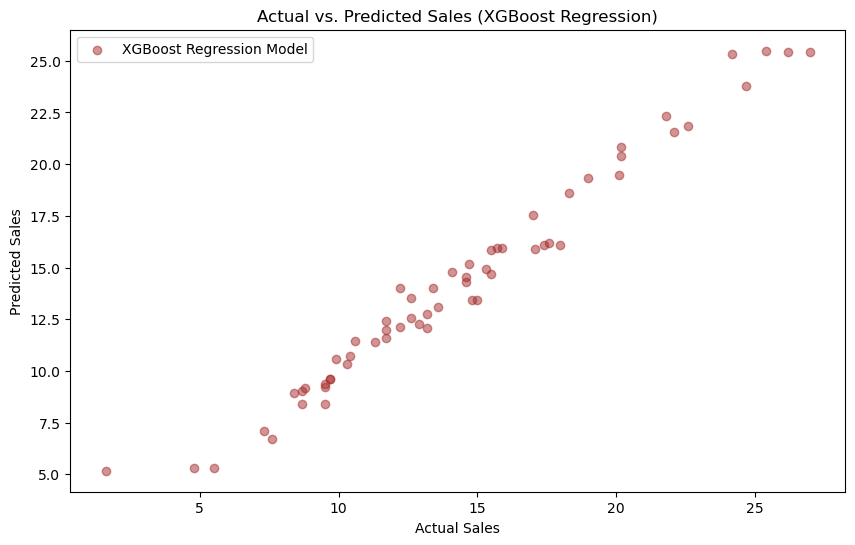

In [80]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_7, label='XGBoost Regression Model', alpha=0.5, color='brown')

plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales (XGBoost Regression)')
plt.legend()
plt.show()

##### Model r^2 scores of each regression model

In [81]:
model_r2_scores = {
     "Linear Regression Model":  r2_score(y_test, y_pred_1),

     "Random Forest Regression Model":  r2_score(y_test, y_pred_2),

     "Ridge Regression Model":  r2_score(y_test, y_pred_3),

     "Lasso Regression Model":  r2_score(y_test, y_pred_4),

     "ElasticNet Regression Model":  r2_score(y_test, y_pred_5),

     "Gradient Boosting Regression Model": r2_score(y_test, y_pred_6),

     "XGBoost Regression Model":  r2_score(y_test, y_pred_7)
}

In [93]:
model_r2_scores

{'Linear Regression Model': 0.8859649783578775,
 'Random Forest Regression Model': 0.9692326073896234,
 'Ridge Regression Model': 0.885965692374097,
 'Lasso Regression Model': 0.8873432660828356,
 'ElasticNet Regression Model': 0.8867449612862289,
 'Gradient Boosting Regression Model': 0.9759214404300837,
 'XGBoost Regression Model': 0.9736706437287413}

In [90]:
best_model_name = max(model_r2_scores, key=model_r2_scores.get)
best_r2_score = model_r2_scores[best_model_name]

print(f"Best Performing Model is {best_model_name} with an R^2 score of {best_r2_score}")

Best Performing Model is Gradient Boosting Regression Model with an R^2 score of 0.9759214404300837


### 5. Saving the Model having the best fit

In [83]:
final_model = model_6
joblib.dump(final_model, 'gradient_boosting_model.pkl')

['gradient_boosting_model.pkl']

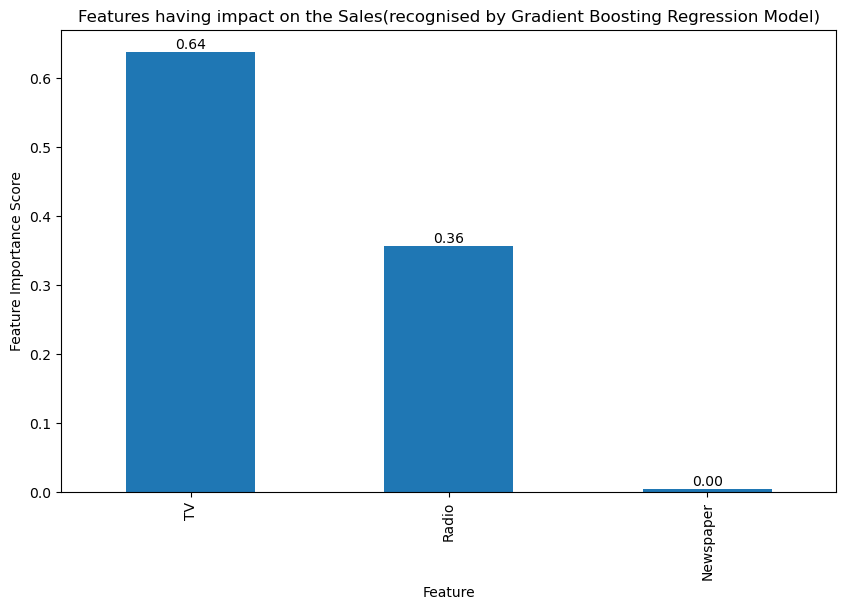

In [89]:
feature_importances = pd.Series(final_model.feature_importances_, index=x.columns)
plt.figure(figsize=(10, 6))
features = feature_importances
features.plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Feature Importance Score')
plt.title('Features having impact on the Sales(recognised by Gradient Boosting Regression Model)')
for index, value in enumerate(features):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
plt.show()